#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [2]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\kaisa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

$PATH


In [4]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [5]:
import wget
url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root'
download=wget.download(url)
!mkdir LHCb_Data && mv B2HHH_MagnetDown.root ./LHCb_Data/B2HHH_MagnetDown.root
# If we ALL do this too often, CERN will block our IP address....

100% [......................................................................] 666484974 / 666484974

A subdirectory or file LHCb_Data already exists.


In [6]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np
#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open (r"C:\Users\kaisa\Downloads/B2HHH_MagnetDown.root")
#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [7]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()
#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [8]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

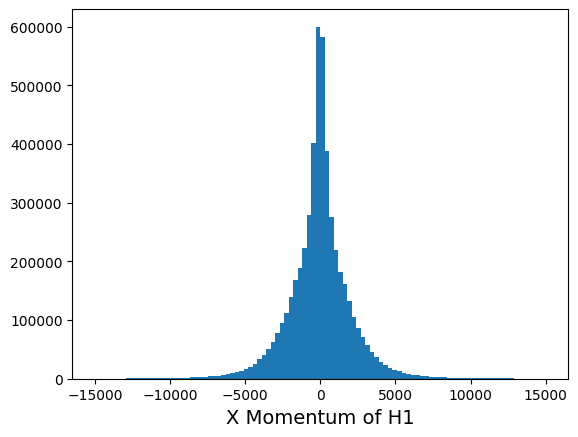

In [9]:
#lets plot something!
import matplotlib.pylab as plt
# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000));
plt.xlabel('X Momentum of H1', fontsize=14);


<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

Text(0.5, 0, 'Total Momentum of H1')

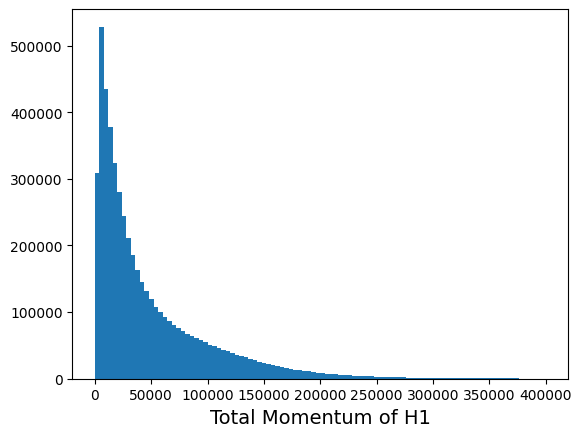

In [10]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events=f['DecayTree']
H1_PX=Events['H1_PX'].array()
H1_PY=Events['H1_PY'].array()
H1_PZ=Events['H1_PZ'].array()

# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
H1_Ptot=np.sqrt(H1_PX**(2)+H1_PY**(2)+H1_PZ**(2))

# then here you can plot something (remember to adjust the range)
plt.figure()
plt.hist(H1_Ptot, bins=100, range=(0,400000))
plt.xlabel('Total Momentum of H1', fontsize=14)


In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

Text(0.5, 0, 'Total Momentum of M')

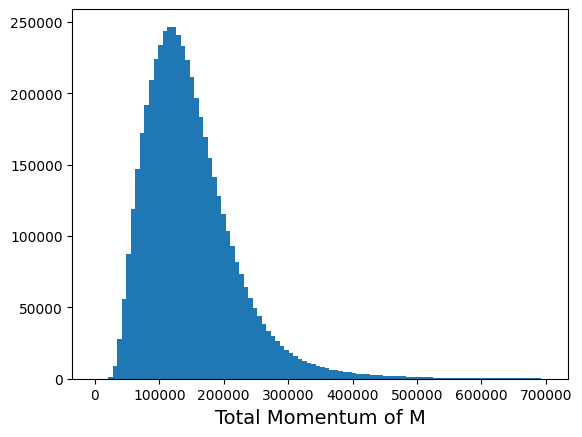

In [11]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...

#accessing the data from the decay Tree and loading one array per variable
H2_PX=Events['H2_PX'].array()
H2_PY=Events['H2_PY'].array()
H2_PZ=Events['H2_PZ'].array()
H3_PX=Events['H3_PX'].array()
H3_PY=Events['H3_PY'].array()
H3_PZ=Events['H3_PZ'].array()

# adding daughter components separately
M_PX=H1_PX+H2_PX+H3_PX
M_PY=H1_PY+H2_PY+H3_PY
M_PZ=H1_PZ+H2_PZ+H3_PZ

# calculating total momentum
M_Ptot=np.sqrt(M_PX**(2)+M_PY**(2)+M_PZ**(2))

# plotting
plt.figure()
plt.hist(M_Ptot, bins=100, range=(0,700000))
plt.xlabel('Total Momentum of M', fontsize=14)

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [12]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches=Events.arrays()
# figure out how to convert to the python 'list' format and use it there
branches_dictionary=branches.tolist()
# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print ("%s  :  %s"%(branch, value))

Event number #45
-------------------
B_FlightDistance  :  257.00205776946603
B_VertexChi2  :  1.865567179221614
H1_PX  :  420.3413896413646
H1_PY  :  -110.66276079201207
H1_PZ  :  5883.766388082404
H1_ProbK  :  0.012183159589767456
H1_ProbPi  :  0.8191394209861755
H1_Charge  :  -1
H1_IPChi2  :  27121.53690741779
H1_isMuon  :  1
H2_PX  :  -985.6367588987478
H2_PY  :  630.9893539299605
H2_PZ  :  35342.13861801284
H2_ProbK  :  0.6670113801956177
H2_ProbPi  :  0.04563945531845093
H2_Charge  :  1
H2_IPChi2  :  13712.438218214942
H2_isMuon  :  0
H3_PX  :  -6242.300384410311
H3_PY  :  -862.2130979651508
H3_PZ  :  277275.49225626234
H3_ProbK  :  0.07501816749572754
H3_ProbPi  :  0.428352952003479
H3_Charge  :  1
H3_IPChi2  :  1026.12298434195
H3_isMuon  :  0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

In [20]:
#formula to calculate the energy of each Kaon
def Energy(momentum, mass):
    Energy_kaon=np.sqrt(momentum**(2)+mass**(2))
    return Energy_kaon

# we already have H1_Ptot but H2 and H3 momentums are still uknown
H2_Ptot=np.sqrt(H2_PX**(2)+H2_PY**(2)+H2_PZ**(2))
H3_Ptot=np.sqrt(H3_PX**(2)+H3_PY**(2)+H3_PZ**(2))

# mass of the Kaon from https://pdg.lbl.gov/2020/listings/rpp2020-list-K-plus-minus.pdf
mass_Kaon=493.677

#calculating the energy of each Kaon
Energy_H1=Energy(H1_Ptot, mass_Kaon)
Energy_H2=Energy(H2_Ptot, mass_Kaon)
Energy_H3=Energy(H3_Ptot, mass_Kaon)

We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

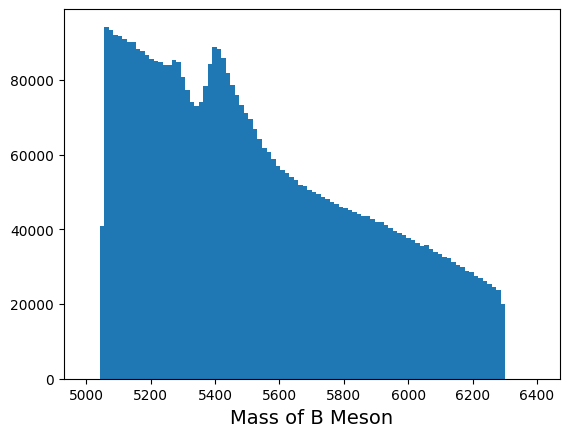

In [21]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters
Energy_B=Energy_H1+Energy_H2+Energy_H3

# the experimetal mass
mass_B=np.sqrt(Energy_B**(2)-M_Ptot**(2))

#Now plot a histogram of the range of masses of the B meson.
plt.hist(mass_B, bins=100, range=(5000,6400))
plt.xlabel('Mass of B Meson', fontsize=14)
plt.show()

#Does this match what we would expect from theory?
# theoretical value is 5.279Ge/v=5279Me/V which is not far off from the experimental value in the plot (~5400Me/V)
# source: https://www.oxfordreference.com/display/10.1093/oi/authority.20110803095514188#:~:text=It%20is%20electrically%20neutral%2C%20has,a%%20mass%20of%205.279%20GeV

#Hint - look it up

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

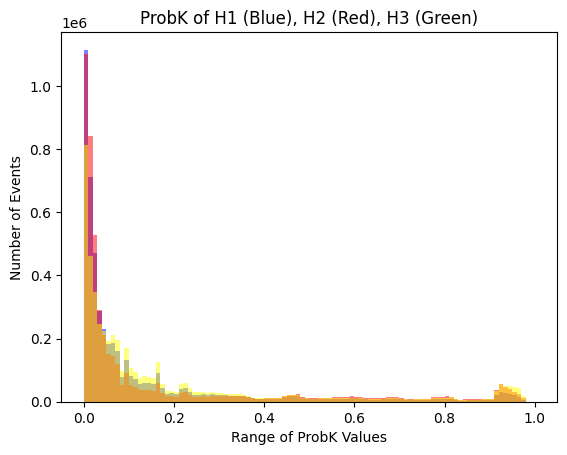

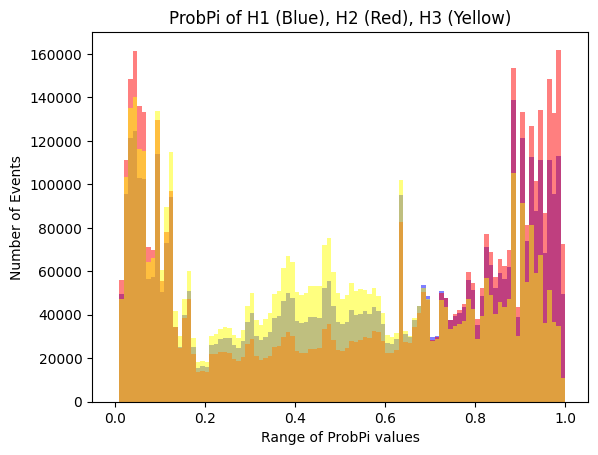

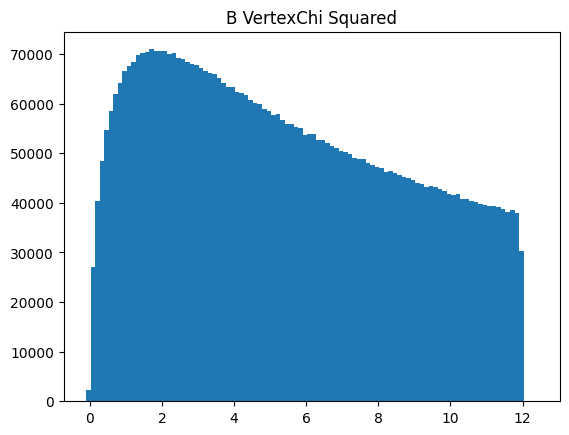

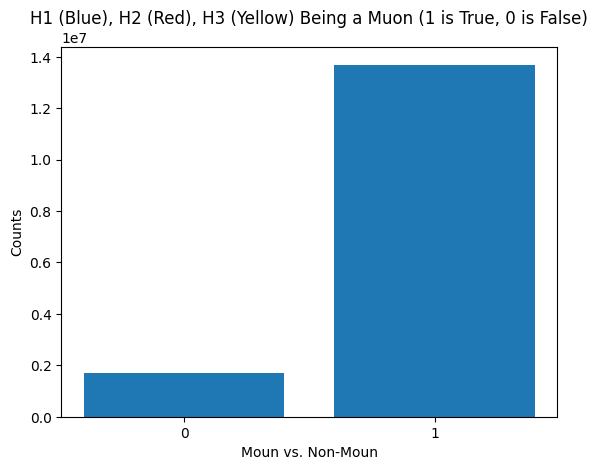

In [22]:
#Make plots of H1/H2/H3 _ProbK on one plot
plt.hist(branches['H1_ProbK'], bins=100, range=(0,1), color='blue', alpha=0.5)
plt.hist(branches['H2_ProbK'], bins=100, range=(0,1), color='red', alpha=0.5)
plt.hist(branches['H3_ProbK'], bins=100, range=(0,1), color='yellow', alpha=0.5)
plt.title('ProbK of H1 (Blue), H2 (Red), H3 (Green)')
plt.xlabel('Range of ProbK Values')
plt.ylabel('Number of Events')
plt.show()
#Make plots of H1/H2/H3 _ProbPi on one plot
plt.hist(branches['H1_ProbPi'], bins=100, range=(0,1), color='blue', alpha=0.5)
plt.hist(branches['H2_ProbPi'], bins=100, range=(0,1), color='red', alpha=0.5)
plt.hist(branches['H3_ProbPi'], bins=100, range=(0,1), color='yellow', alpha=0.5)
plt.title('ProbPi of H1 (Blue), H2 (Red), H3 (Yellow)')
plt.xlabel('Range of ProbPi values')
plt.ylabel('Number of Events')
plt.show()
#For all our particles, make a plot of the B_VertexChi2
plt.hist(branches['B_VertexChi2'], bins=100, range=(-0.1,12.4))
plt.title('B VertexChi Squared')
plt.show()
# Plot any other variables from the list above you think would be handy to use in a selection...
muon_counts=(np.sum(branches['H1_isMuon']==1)+ np.sum(branches['H2_isMuon']==1)+ np.sum(branches['H3_isMuon']==1))
nonmuon_counts=(np.sum(branches['H1_isMuon']==0)+ np.sum(branches['H2_isMuon']==0)+ np.sum(branches['H3_isMuon']==0))
counts=(muon_counts, nonmuon_counts)
label=('0', '1')
plt.bar(label, counts)
plt.title('H1 (Blue), H2 (Red), H3 (Yellow) Being a Muon (1 is True, 0 is False)')
plt.xlabel('Moun vs. Non-Moun')
plt.ylabel('Counts',)
plt.show()

Using these plots, we can now think about making a preselection. This has some format like the below:

In [23]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)
# counting the number of events pre-selection
init_nr_events=len(branches_dictionary)
print(f"before the filter: {init_nr_events}")

# creating the filter to use it on events
selection=(branches['H1_ProbPi']<0.9) & (branches['H2_ProbPi']<0.9) & (branches['H3_ProbPi']<0.9) & \
(branches['H1_isMuon']!=1) & (branches['H2_isMuon']!=1) & (branches['H3_isMuon']!=1) & \
(branches['H1_ProbK']>branches['H1_ProbPi']) & (branches['H2_ProbK']>branches['H2_ProbPi']) & (branches['H3_ProbK']>branches['H3_ProbPi']) & \
(branches['B_FlightDistance']<10) & (branches['B_VertexChi2']<20)

before the filter: 5135823


after the filter: 25181


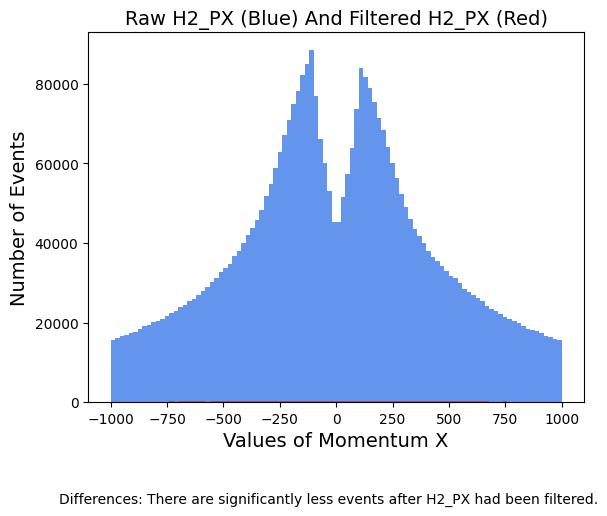

In [24]:
#To apply the selection - we can use the selection command after our instruction e.g.:
# CutTree=branches['H2_PX'][selection]
#probably we can make this more generic - try below if you like...

post_events=branches[selection]

# the number of events post-selection
final_nr_events=len(post_events)
print(f"after the filter: {final_nr_events}")

#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree
CutTree=post_events
#Try plotting our H2_PX distribution with and without the selection and spot the differences...
plt.hist(branches['H2_PX'], bins=100, range=(-1000,1000), color='cornflowerblue')
plt.hist(CutTree['H2_PX'], bins=100, range=(-1000,1000), color='red', alpha=0.5)
plt.title('Raw H2_PX (Blue) And Filtered H2_PX (Red)', fontsize=14)
plt.xlabel('Values of Momentum X', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.figtext(0.5, -0.1, "Differences: There are significantly less events after H2_PX had been filtered.", ha='center')
plt.show()


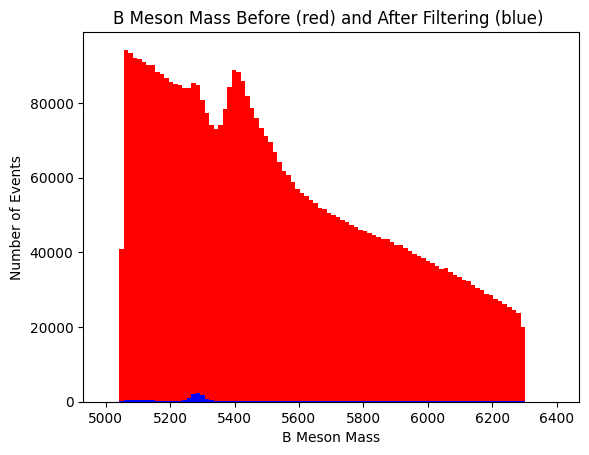

In [25]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)

# calculating the post-selection total momentum and mass of B meson
post_Ptot=np.sqrt((CutTree['H1_PX']+CutTree['H2_PX']+CutTree['H3_PX'])**(2)+(CutTree['H1_PY']+CutTree['H2_PY']+CutTree['H3_PY'])**(2)+(CutTree['H1_PZ']+CutTree['H2_PZ']+CutTree['H3_PZ'])**(2))

Ptot_post_H1=np.sqrt(CutTree['H1_PX']**(2)+CutTree['H1_PY']**(2)+CutTree['H1_PZ']**(2))
Ptot_post_H2=np.sqrt(CutTree['H2_PX']**(2)+CutTree['H2_PY']**(2)+CutTree['H2_PZ']**(2))
Ptot_post_H3=np.sqrt(CutTree['H3_PX']**(2)+CutTree['H3_PY']**(2)+CutTree['H3_PZ']**(2))

Energy_H1_post=Energy(Ptot_post_H1, mass_Kaon)
Energy_H2_post=Energy(Ptot_post_H2, mass_Kaon)
Energy_H3_post=Energy(Ptot_post_H3, mass_Kaon)

Energy_B_post=Energy_H1_post+Energy_H2_post+Energy_H3_post

mass_B_post=np.sqrt((Energy_B_post)**(2)-(post_Ptot)**(2))

# plotting
plt.hist(mass_B, bins=100, range=(5000,6400), color='red')
plt.hist(mass_B_post, bins=100, range=(5000,6400), color='Blue')
plt.title('B Meson Mass Before (red) and After Filtering (blue) ')
plt.xlabel('B Meson Mass')
plt.ylabel('Number of Events')
plt.show()
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

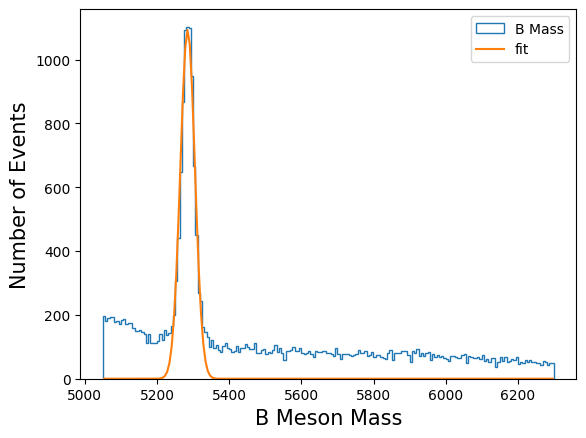

In [26]:
# Grab another package
from scipy.optimize import curve_fit

# Start by defining the variable we are interested in...
B_Mass = mass_B_post

# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
max=np.max(B_Mass)
min=np.min(B_Mass)
bin_height, bin_edge, _=plt.hist(B_Mass, bins=200, range=(min, max), label = "B Mass", histtype=u'step')

# now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
x_data = (bin_edge[:-1]+bin_edge[1:])/2
y_data = bin_height

#Create a Gauss function for fitting - nothing needs changing here
def gauss (x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# Get the fitted curve - some things need changing here
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0=[np.max(y_data), np.mean(B_Mass), np.std(B_Mass)])
#note you need to pick some initial parameters in p0= above!

y_fit = gauss(x_data, *optimisedParameters)

# Now do some overlaying in the plotting environment - nothing major needs changing here - just label it well

plt.plot(x_data, y_fit, label='fit');
plt.xlabel("B Meson Mass", fontsize=15)
plt.ylabel("Number of Events", fontsize=15)
plt.legend()
plt.show()

# the fit is wrong (at 0)
# where is the combined curve?

[1092.9730252  5284.71499759   20.25203863]


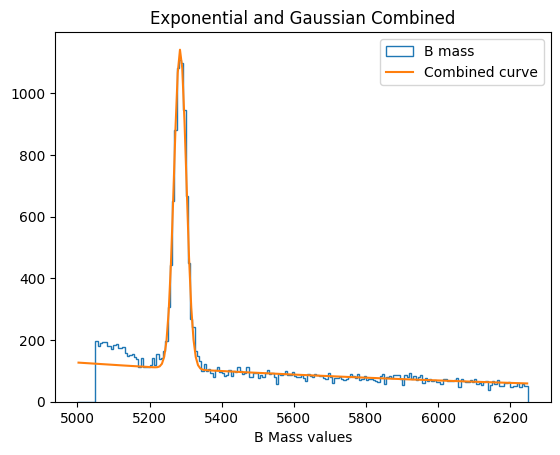

In [31]:
# Explore optimisedParameters - what does it contain?
print(f"{optimisedParameters}")
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background
# which has an exponential shape - and we want to make a combined model to fit which contains both
# the gauss and the exponential...

# exponential will be the backround?
# L is lambda
def exponential_backround(x, B, L):
    exp = B*np.exp(-L*x)
    return exp
    
# and then I need to combine gaussian and exponential
def gaussian_exp(x, A, mu, sigma, B, L):
    combo = gauss(x, A, mu, sigma) + exponential_backround(x, B, L)
    return combo

# plotting them combined
bin_height, bin_edge, _ = plt.hist(B_Mass, bins=200, range=(5000, 6250), label='B mass', histtype= u'step')

# same as before
x_data=(bin_edge[:-1]+bin_edge[1:])/2
y_data=bin_height

# fitting the exponential curve
optimisedParametersWithExp, pcov_w_exponential= curve_fit(gaussian_exp, x_data, y_data, p0=[np.max(y_data), np.mean(B_Mass), 313.5, np.max(y_data), 0.0000005])
y_fit_with_exp = gaussian_exp(x_data, *optimisedParametersWithExp)

# plotting part
plt.plot(x_data, y_fit_with_exp, label='Combined curve')
plt.xlabel('B Mass values')
plt.title('Exponential and Gaussian Combined')
plt.legend()
plt.show()


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [97]:
# so how good was the fit and how many events do you have?
# find the yield
def signal_yield(A, sigma, max_mass, min_mass, bins):
    yield_signal = (A*sigma*np.sqrt(2*np.pi)/(max_mass-min_mass))*bins
    return yield_signal
    
# uncertainty of the yield
def yield_uncertainty(delta_A, A, delta_sigma, sigma, signal_yield):
    uncertainty = np.sqrt((delta_A/A+(1e-10))**(2)+(delta_sigma/sigma+(1e-10)**(2)))*signal_yield
    return uncertainty

# initiating the variables
A, mu, sigma, B, L=optimisedParametersWithExp

# pcov contains uncertainties so these steps are to separate them
variances=np.diag(pcov_w_exponential) # variances are extracted and put into an array
uncertainty_A=np.sqrt(variances[0]) # finding error of A
uncertainty_sigma=np.sqrt(variances[2]) # error of sigma

total_events = np.sum(y_data)
uncertainty_total_events= np.sqrt(total_events)

yield_ = signal_yield(A, sigma, 6250, 5000, 200)
uncertainty_yield = yield_uncertainty(uncertainty_A, A, uncertainty_sigma, sigma, yield_)

# if backround yield is low then most events are from the signal, meaning it is a good fit
backround_yield = total_events - yield_
uncertainty_backround_yield = np.sqrt(uncertainty_total_events**2+uncertainty_yield**2)

# do the frame.chiSquare() to find out whether this is a good fit or not
# that won't work so I calculate it manually
def x2(y_data, y_fit, optimisedParameters):
    x2 = (np.sum((y_data-y_fit)**2/(y_fit+(1e-6))))/(len(y_data)-len(optimisedParameters))
    return x2

x2_combo= x2(y_data, y_fit_with_exp, optimisedParametersWithExp)
x2_gaussian= x2(y_data, y_fit, optimisedParameters)

# for each model print the signal and backround yields (with errors) and report the x2
print(f"Signal yield: {yield_:.2f}")
print(f"Signal yield sigma: {uncertainty_yield:.2f}")
print(f"Backround yield: {backround_yield:.2f}")
print(f"Backround yield sigma: {uncertainty_backround_yield:.2f}")
print(f"ChiSquared for gaussian fit: {x2_gaussian:.2f}")
print(f"ChiSquared for combined fit: {x2_combo:.2f}")

Signal yield: 7069.77
Signal yield sigma: 1030.50
Backround yield: 17729.23
Backround yield sigma: 1042.46
ChiSquared for gaussian fit: 5865650804.51
ChiSquared for combined fit: 8.86


The combined fit of Expoential and Gaussian is the most accurate as its ChiSquared value is much smaller than Gaussian's. Nevertheless the chisquared of both are still large (especially the Gaussian fit), meaning that the fitting should be even further improved for better results.

# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

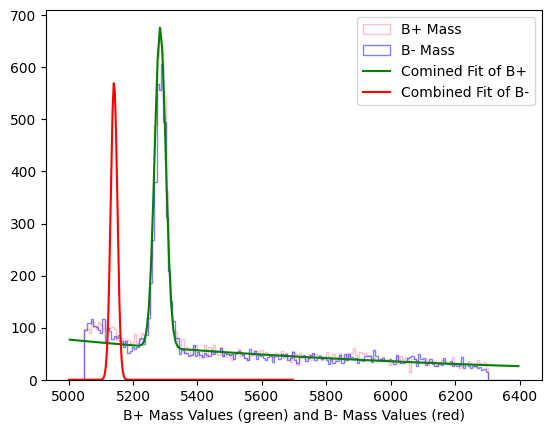

signal yield of B+: 4241.968934438038, 635.9165738280373
signal yield of B-: 2338.240698198787, 546.4648906634069
assymetry: -0.2893111834609421
uncertainty: 0.011800454937042546


In [115]:
#Here do your calculation of the final result
# making the filters
selection_B_plus=((CutTree['H1_Charge']<0) & (CutTree['H2_Charge']>0) & (CutTree['H3_Charge']>0)|
(CutTree['H1_Charge']>0) & (CutTree['H2_Charge']<0) & (CutTree['H3_Charge']>0)|
(CutTree['H1_Charge']>0) & (CutTree['H2_Charge']>0) & (CutTree['H3_Charge']<0))

selection_B_minus=((CutTree['H1_Charge']<0) & (CutTree['H2_Charge']<0) & (CutTree['H3_Charge']>0)|
(CutTree['H1_Charge']<0) & (CutTree['H2_Charge']>0) & (CutTree['H3_Charge']<0)|
(CutTree['H1_Charge']>0) & (CutTree['H2_Charge']<0) & (CutTree['H3_Charge']<0))

# filtering the data to find B+ and B-
filtered_plus=CutTree[selection_B_plus]
filtered_minus=CutTree[selection_B_minus]

# counting how many B+ and B- there are
count_plus_events=len(filtered_plus)
count_minus_events=len(filtered_minus)

# plot B mass and fit the model to find the yield
# calculating the values to find mass B
filter2_ptot_PLUS=np.sqrt((filtered_plus['H1_PX']+filtered_plus['H2_PX']+filtered_plus['H3_PX'])**(2)+
                     +(filtered_plus['H1_PY']+filtered_plus['H2_PY']+filtered_plus['H3_PY'])**(2)
                     +(filtered_plus['H1_PZ']+filtered_plus['H2_PZ']+filtered_plus['H3_PZ'])**(2))
                       
filter2_ptot_MINUS=np.sqrt((filtered_minus['H1_PZ']+filtered_minus['H2_PZ']+filtered_minus['H3_PZ'])**(2)
                        +(filtered_minus['H1_PY']+filtered_minus['H2_PY']+filtered_minus['H3_PY'])**(2)
                        +(filtered_minus['H1_PX']+filtered_minus['H2_PX']+filtered_minus['H3_PX'])**(2))

filter2_ptot_H1_PLUS=np.sqrt(filtered_plus['H1_PX']**(2)+filtered_plus['H1_PY']**(2)+filtered_plus['H1_PZ']**(2))
filter2_ptot_H1_MINUS=np.sqrt(filtered_minus['H1_PX']**(2)+filtered_minus['H1_PY']**(2)+filtered_minus['H1_PZ']**(2))
filter2_ptot_H2_PLUS=np.sqrt(filtered_plus['H2_PX']**(2)+filtered_plus['H2_PY']**(2)+filtered_plus['H2_PZ']**(2))
filter2_ptot_H2_MINUS=np.sqrt(filtered_minus['H2_PX']**(2)+filtered_minus['H2_PY']**(2)+filtered_minus['H2_PZ']**(2))
filter2_ptot_H3_PLUS=np.sqrt(filtered_plus['H3_PX']**(2)+filtered_plus['H3_PY']**(2)+filtered_plus['H3_PZ']**(2))
filter2_ptot_H3_MINUS=np.sqrt(filtered_minus['H3_PX']**(2)+filtered_minus['H3_PY']**(2)+filtered_minus['H3_PZ']**(2))

Energy_H1_PLUS_filter2=Energy(filter2_ptot_H1_PLUS, mass_Kaon)
Energy_H1_MINUS_filter2=Energy(filter2_ptot_H1_MINUS, mass_Kaon)
Energy_H2_PLUS_filter2=Energy(filter2_ptot_H2_PLUS, mass_Kaon)
Energy_H2_MINUS_filter2=Energy(filter2_ptot_H2_MINUS, mass_Kaon)
Energy_H3_PLUS_filter2=Energy(filter2_ptot_H3_PLUS, mass_Kaon)
Energy_H3_MINUS_filter2=Energy(filter2_ptot_H3_MINUS, mass_Kaon)

Energy_B_PLUS_filter2=Energy_H1_PLUS_filter2+Energy_H2_PLUS_filter2+Energy_H3_PLUS_filter2
Energy_B_MINUS_filter2=Energy_H1_MINUS_filter2+Energy_H2_MINUS_filter2+Energy_H3_MINUS_filter2

# B+ and B- masses combined
mass_B_PLUS_filter2=np.sqrt((Energy_B_PLUS_filter2)**(2)-(filter2_ptot_PLUS)**(2))
mass_B_MINUS_filter2=np.sqrt((Energy_B_MINUS_filter2)**(2)-(filter2_ptot_MINUS)**(2))

# plotting the masses separately into one plot
bin_height_BPLUS, bin_edge_BPLUS, _ = plt.hist(mass_B_PLUS_filter2, bins=200, range=(5000, 6400), label='B+ Mass', histtype=u'step', color='pink')
bin_height_BMINUS, bin_edge_BMINUS, _ = plt.hist(mass_B_MINUS_filter2, bins=200, range=(5000, 6400), label='B- Mass', histtype=u'step', color='blue', alpha=0.5)

x_data_BPLUS = (bin_edge_BPLUS[:-1]+bin_edge_BPLUS[1:])/2
y_data_BPLUS = bin_height_BPLUS
x_data_BMINUS = (bin_edge_BMINUS[:-1]+bin_edge_BMINUS[:1])/2
y_data_BMINUS = bin_height_BMINUS

optimisedParametersBPLUS, pcovBPLUS = curve_fit(gaussian_exp, x_data_BPLUS, y_data_BPLUS, p0=[np.max(y_data_BPLUS), np.mean(mass_B_PLUS_filter2), 333, np.max(y_data_BPLUS), 0.0000005])
y_fit_BPLUS = gaussian_exp(x_data_BPLUS, *optimisedParametersBPLUS)
optimisedParametersBMINUS, pcovBMINUS = curve_fit(gaussian_exp, x_data_BMINUS, y_data_BMINUS, p0=[np.max(y_data_BMINUS), np.mean(mass_B_MINUS_filter2), 333, np.max(y_data_BMINUS), 0.0000005])
y_fit_BMINUS = gaussian_exp(x_data_BMINUS, *optimisedParametersBMINUS)

plt.plot(x_data_BPLUS, y_fit_BPLUS, label='Comined Fit of B+', color='green')
plt.plot(x_data_BMINUS, y_fit_BMINUS, label='Combined Fit of B-', color='red')
plt.xlabel('B+ Mass Values (green) and B- Mass Values (red)')
plt.legend()
plt.show()

# getting uncertainty of A and sigma from variances
variancesofBPLUS = np.diag(pcovBPLUS)
variancesofBMINUS = np.diag(pcovBMINUS)
uncertainty_A_ofBPLUS = np.sqrt(variancesofBPLUS[0])
uncertainty_A_ofBMINUS = np.sqrt(variancesofBMINUS[0])
uncertainty_sigma_BPLUS = np.sqrt(variancesofBPLUS[2])
uncertainty_sigma_BMINUS = np.sqrt(variancesofBMINUS[2])
AofBPLUS, mu, sigma_BPLUS, B, L = optimisedParametersBPLUS
AofBMINUS, mu, sigma_BMINUS, B, L = optimisedParametersBMINUS

# calculating the signal yield again
signal_yield_BPLUS = signal_yield(AofBPLUS, sigma_BPLUS, max, min, 200)
signal_yield_BMINUS = signal_yield(AofBMINUS, sigma_BMINUS, max, min, 200)
uncertainty_signal_yield_BPLUS = yield_uncertainty(uncertainty_A_ofBPLUS, AofBPLUS, uncertainty_sigma_BPLUS, sigma_BPLUS, signal_yield_BPLUS)
uncertainty_signal_yield_BMINUS = yield_uncertainty(uncertainty_A_ofBMINUS, AofBMINUS, uncertainty_sigma_BMINUS, sigma_BMINUS, signal_yield_BMINUS)

# this is to check that none are negative
print(f"signal yield of B+: {signal_yield_BPLUS}, {uncertainty_signal_yield_BPLUS}")
print(f"signal yield of B-: {signal_yield_BMINUS}, {uncertainty_signal_yield_BMINUS}")

# calculating assymetry and uncertainty
Assymetry = (signal_yield_BMINUS-signal_yield_BPLUS)/(signal_yield_BMINUS+signal_yield_BPLUS)
sigma_both = np.sqrt((1-Assymetry**(2))/(signal_yield_BMINUS+signal_yield_BPLUS))
                
# displaying results
print(f"assymetry: {Assymetry}") # should be in the range of -1 and 1
print(f"uncertainty: {sigma_both}")

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

In [ ]:
file= "B2HHH_MagnetUp.root"
f=uproot.open(file)
f.keys()
f["DecayTree"].show()
f["DecayTree"].keys()

Events=f["DecayTree"]
branchesfile=Events.arrays()
branches_dictionary_file=branchesfile.tolist()

# selecting events with best values (same criteria as when best B masses were selected above)
selectionfile = ((branchesfile['H1_ProbK'] > branchesfile['H1_ProbPi']) &
                 (branchesfile['H2_ProbK'] > branchesfile['H2_ProbPi']) &
                 (branchesfile['H3_ProbK'] > branchesfile['H3_ProbPi']) &
                 (branchesfile['H1_isMuon'] != 1) &
                 (branchesfile['H2_isMuon'] != 1) &
                 (branchesfile['H3_isMuon'] != 1) &
                 (branchesfile['B_FlightDistance'] < 20) &
                 (branchesfile['B_VertexChi2'] < 20))

# applying the selection to the data in the file
CutTreefile = branchesfile[selectionfile]
all_selected_events_file = len(CutTreefile)

# making filters to separate B+ and B-
file_BMINUS=((CutTreefile['H1_Charge'] > 0) & (CutTreefile['H2_Charge'] < 0) & (CutTreefile['H3_Charge'] < 0)|
              (CutTreefile['H1_Charge'] < 0) & (CutTreefile['H2_Charge'] > 0) & (CutTreefile['H3_Charge'] < 0)|
             (CutTreefile['H1_Charge'] < 0) & (CutTreefile['H2_Charge'] < 0) & (CutTreefile['H3_Charge'] > 0))
file_BPLUS=((CutTreefile['H1_Charge'] > 0) & (CutTreefile['H2_Charge'] > 0) & (CutTreefile['H3_Charge'] < 0)|
            (CutTreefile['H1_Charge'] < 0) & (CutTreefile['H2_Charge'] > 0) & (CutTreefile['H3_Charge'] > 0)|
            (CutTreefile['H1_Charge'] > 0) & (CutTreefile['H2_Charge'] < 0) & (CutTreefile['H3_Charge'] > 0))

# applying filters
BMINUS_file = CutTreefile[file_BMINUS]
BPLUS_file = CutTreefile[file_BPLUS]

# calculating the masses of B+ and B-
BMINUS_PX_file = BMINUS_file['H1_PX']+BMINUS_file['H2_PX']+BMINUS_file['H3_PX']
BMINUS_PY_file = BMINUS_file['H1_PY']+BMINUS_file['H2_PY']+BMINUS_file['H3_PY']
BMINUS_PZ_file = BMINUS_file['H1_PZ']+BMINUS_file['H2_PZ']+BMINUS_file['H3_PZ']
BPLUS_PX_file = BPLUS_file['H1_PX']+BPLUS_file['H2_PX']+BPLUS_file['H3_PX']
BPLUS_PY_file = BPLUS_file['H1_PY']+BPLUS_file['H2_PY']+BPLUS_file['H3_PY']
BPLUS_PZ_file = BPLUS_file['H1_PZ']+BPLUS_file['H2_PZ']+BPLUS_file['H3_PZ']

BMINUS_ptot_file = np.sqrt(BMINUS_PX_file**(2)+BMINUS_PY_file**(2)+BMINUS_PZ_file**(2))
BPLUS_ptot_file = np.sqrt(BPLUS_PX_file**(2)+BPLUS_PY_file**(2)+BPLUS_PZ_file**(2))

H1_BMINUS_Ptot_file = np.sqrt(BMINUS_file['H1_PX']**(2)+BMINUS_file['H1_PY']**(2)+BMINUS_file['H1_PZ']**(2))
H2_BMINUS_Ptot_file = np.sqrt(BMINUS_file['H2_PX']**(2)+BMINUS_file['H2_PY']**(2)+BMINUS_file['H2_PZ']**(2))
H3_BMINUS_Ptot_file = np.sqrt(BMINUS_file['H3_PX']**(2)+BMINUS_file['H3_PY']**(2)+BMINUS_file['H3_PZ']**(2))
H1_BPLUS_Ptot_file = np.sqrt(BPLUS_file['H1_PX']**(2)+BPLUS_file['H1_PY']**(2)+BPLUS_file['H1_PZ']**(2))
H2_BPLUS_Ptot_file = np.sqrt(BPLUS_file['H2_PX']**(2)+BPLUS_file['H2_PY']**(2)+BPLUS_file['H2_PZ']**(2))
H3_BPLUS_Ptot_file = np.sqrt(BPLUS_file['H3_PX']**(2)+BPLUS_file['H3_PY']**(2)+BPLUS_file['H3_PZ']**(2))

Energy_H1_BPLUS_file = Energy(H1_BPLUS_Ptot_file, mass_Kaon)
Energy_H2_BPLUS_file = Energy(H2_BPLUS_Ptot_file, mass_Kaon)
Energy_H3_BPLUS_file = Energy(H3_BPLUS_Ptot_file, mass_Kaon)
Energy_H1_BMINUS_file = Energy(H1_BMINUS_Ptot_file, mass_Kaon)
Energy_H2_BMINUS_file = Energy(H2_BMINUS_Ptot_file, mass_Kaon)
Energy_H3_BMINUS_file = Energy(H3_BMINUS_Ptot_file, mass_Kaon)

Energy_BPLUS_file = Energy_H1_BPLUS_file + Energy_H2_BPLUS_file + Energy_H3_BPLUS_file
Energy_BMINUS_file = Energy_H1_BMINUS_file + Energy_H2_BMINUS_file + Energy_H3_BMINUS_file

BMINUS_mass = np.sqrt((Energy_BMINUS_file)**(2)-(BMINUS_ptot_file)**(2))
BPLUS_mass = np.sqrt((Energy_BPLUS_file)**(2)-(BPLUS_ptot_file)**(2))

# plotting B+ and B-
bin_height_BMINUS_file, bin_edge_BMINUS_file, _ = plt.hist(BMINUS_mass, bins=200, range=(5000, 6400), label='B- Mass', histtype=u'step', color='red')
bin_height_BPLUS_file, bin_edge_BPLUS_file, _ = plt.hist(BPLUS_mass, bins=200, range=(5000, 6400), label='B+ Mass', histtype=u'step', color='blue')

x_data_BMINUS_file = (bin_edge_BMINUS_file[:-1]+bin_edge_BMINUS_file[1:])/2
y_data_BMINUS_file = bin_height_BMINUS_file
x_data_BPLUS_file = (bin_edge_BPLUS_file[:-1]+bin_edge_BPLUS_file[1:])/2
y_data_BPLUS_file = bin_height_BPLUS_file

optimisedParameters_BMINUS, pcov_BMINUS = curve_fit(gaussian_exp, x_data_BMINUS_file, y_data_BMINUS_file, p0=[np.max(y_data_BMINUS_file), np.mean(BMINUS_mass), 306, np.max(y_data_BMINUS_file), 0.0000005])
y_fit_BMINUS_file = gaussian_exp(x_data_BMINUS_file, *optimisedParameters_BMINUS)
optimisedParameters_BPLUS, pcov_BPLUS = curve_fit(gaussian_exp, x_data_BPLUS_file, y_data_BPLUS_file, p0=[np.max(y_data_BPLUS_file), np.mean(BPLUS_mass), 306, np.max(y_data_BPLUS_file), 0.0000005])
y_fit_BPLUS_file = gaussian_exp(x_data_BPLUS_file, *optimisedParameters_BPLUS)

plt.plot(x_data_BPLUS_file, y_fit_BPLUS_file, label='Combined fit of B+', color='green')
plt.plot(x_data_BMINUS_file, y_fit_BMINUS_file, label='Combined fit of B-', color='pink')
plt.xlabel('B+ and B- Mass Values')
plt.legend()
plt.show()

# yield and uncertainty
covariance_BMINUS = np.diag(pcov_BMINUS)
covariance_BPLUS = np.diag(pcov_BPLUS)
uncertainty_A_BMINUS = np.sqrt(covariance_BMINUS[0])
uncertainty_A_BPLUS = np.sqrt(covariance_BPLUS[0])
uncertainty_sigma_BMINUS = np.sqrt(covariance_BMINUS[2])
uncertainty_sigma_BPLUS = np.sqrt(covariance_BPLUS[2])
A_BMINUS, mu, sigma_BMINUS, B, L=optimisedParametersBMINUS
A_BPLUS, mu, sigma_BPLUS, B, L=optimisedParametersBPLUS

signal_yield_BMINUS = signal_yield(A_BMINUS, sigma_BMINUS, 6400, 5000, 200)
uncertainty_signal_yield_BMINUS = yield_uncertainty(uncertainty_A_BMINUS, A_BMINUS, uncertainty_sigma_BMINUS, sigma_BMINUS, signal_yield_BMINUS)
signal_yield_BPLUS = signal_yield(A_BPLUS, sigma_BPLUS, 6400, 5000, 200)
uncertainty_signal_yield_BPLUS = yield_uncertainty(uncertainty_A_BPLUS, A_BPLUS, uncertainty_sigma_BPLUS, sigma_BPLUS, signal_yield_BPLUS)

print(f"signal yield B-: {signal_yield_BMINUS}, {uncertainty_signal_yield_BMINUS}")
print(f"signal yield B+: {signal_yield_BPLUS}, {uncertainty_signal_yield_BPLUS}")

Assymetry_file = (signal_yield_BMINUS-signal_yield_BPLUS)/(signal_yield_BMINUS+signal_yield_BPLUS)
Uncertainty_file = np.sqrt((1-Assymetry_file**(2))/(signal_yield_BMINUS+signal_yield_BPLUS))

# displaying yield and uncertainty
print(f"Assymetry: {Assymetry_file}, {Uncertainty_file}")

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

The assymetry is almost identical to the results above (Down file data), although the signal yields of B+ and B- from either dataset differ. The ratio though seems to be aligned (that there is more B+). These results are reasonable in terms that there is (positive) excess mass in the Universe.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)